In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [103]:
df = pd.read_csv('Train.csv')
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [104]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [105]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [106]:
df.shape

(8523, 12)

In [107]:
df['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [108]:
mean_weight = df['Item_Weight'].mean()
median_weight = df['Item_Weight'].median()

In [109]:
print(mean_weight,median_weight)

12.857645184135976 12.6


In [110]:
df['Item_Weight_mean']=df['Item_Weight'].fillna(mean_weight)
df['Item_Weight_median']=df['Item_Weight'].fillna(median_weight)

In [111]:
df.head(1)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
0           FDA15          9.3          Low Fat         0.016047     Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0               Tier 1  Supermarket Type1           3735.138   

   Item_Weight_mean  Item_Weight_median  
0               9.3                 9.3

In [112]:
 print("Original Weight variable variance",df['Item_Weight'].var())
print("Item Weight variance after mean imputation",df['Item_Weight_mean'].var())
print("Item Weight variance after median imputation",df['Item_Weight_median'].var())

Original Weight variable variance 21.56168825983637
Item Weight variance after mean imputation 17.860121735060453
Item Weight variance after median imputation 17.869561454073366


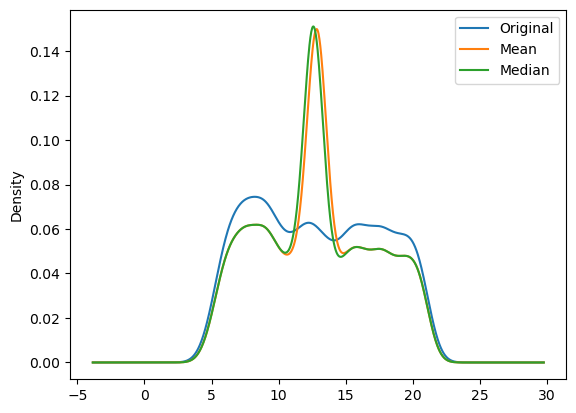

In [113]:
df['Item_Weight'].plot(kind = "kde",label="Original")
df['Item_Weight_mean'].plot(kind = "kde",label = "Mean")
df['Item_Weight_median'].plot(kind = "kde",label = "Median")
plt.legend()
plt.show()

<Axes: >

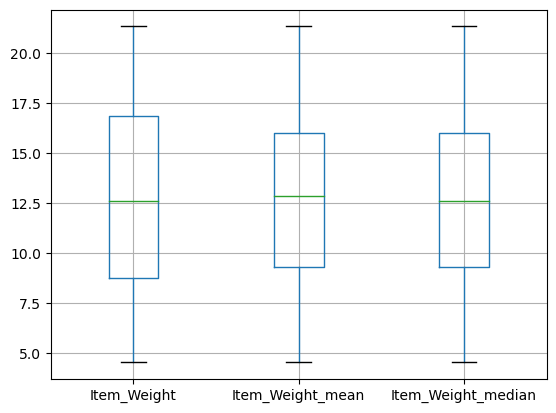

In [114]:
df[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

In [115]:
df['Item_Weight_interpolate']=df['Item_Weight'].interpolate(method="linear")

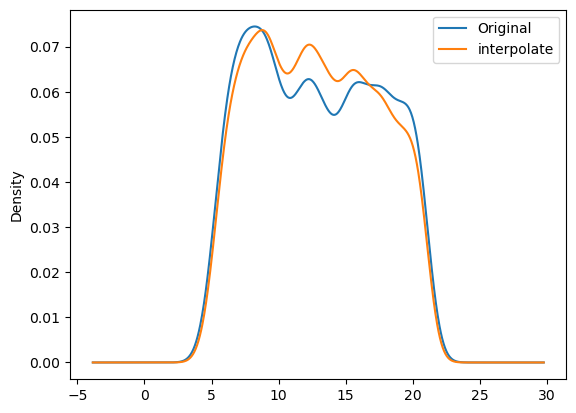

In [116]:
df['Item_Weight'].plot(kind = "kde",label="Original")
df['Item_Weight_interpolate'].plot(kind = "kde",label = "interpolate")
plt.legend()
plt.show()

In [117]:
from sklearn.impute import KNNImputer

In [118]:
knn = KNNImputer(n_neighbors=10,weights="distance")

In [119]:
df['knn_imputer']= knn.fit_transform(df[['Item_Weight']]).ravel()

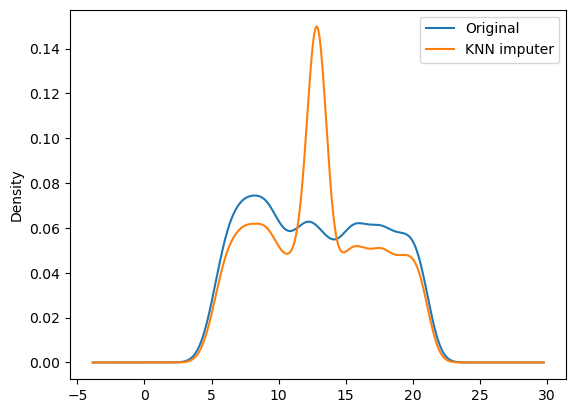

In [120]:
df['Item_Weight'].plot(kind = "kde",label="Original")
df['knn_imputer'].plot(kind = "kde",label = "KNN imputer")
plt.legend()
plt.show()

In [121]:
df=df.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median','knn_imputer'],axis=1)

In [122]:
df.head(1)

Item_Identifier Item_Fat_Content  Item_Visibility Item_Type  Item_MRP  \
0           FDA15          Low Fat         0.016047     Dairy  249.8092   

  Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0               Tier 1  Supermarket Type1           3735.138   

   Item_Weight_interpolate  
0                      9.3

In [123]:
df.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_interpolate         0
dtype: int64

In [124]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [125]:
df['Outlet_Type']

0       Supermarket Type1
1       Supermarket Type2
2       Supermarket Type1
3           Grocery Store
4       Supermarket Type1
              ...        
8518    Supermarket Type1
8519    Supermarket Type1
8520    Supermarket Type1
8521    Supermarket Type2
8522    Supermarket Type1
Name: Outlet_Type, Length: 8523, dtype: object

In [126]:
mode_outlet=df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [127]:
mode_outlet

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium

In [128]:
missing_values=df['Outlet_Size'].isnull()

In [129]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [130]:
df.loc[missing_values,'Outlet_Size']=df.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_outlet[x])

In [131]:
df.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interpolate      0
dtype: int64

In [132]:
df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interpolate'],
      dtype='object')

In [133]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [134]:
df.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular'}},inplace=True)

In [135]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
LF         5517
Regular    3006
Name: count, dtype: int64

In [136]:
df.columns


Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interpolate'],
      dtype='object')

In [137]:
df['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [138]:
df['Item_Visibility_interpolate']=df['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [139]:
df.head(1)

Item_Identifier Item_Fat_Content  Item_Visibility Item_Type  Item_MRP  \
0           FDA15               LF         0.016047     Dairy  249.8092   

  Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0               Tier 1  Supermarket Type1           3735.138   

   Item_Weight_interpolate  Item_Visibility_interpolate  
0                      9.3                     0.016047

In [140]:
df['Item_Visibility_interpolate'].value_counts()

Item_Visibility_interpolate
0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: count, Length: 8405, dtype: int64

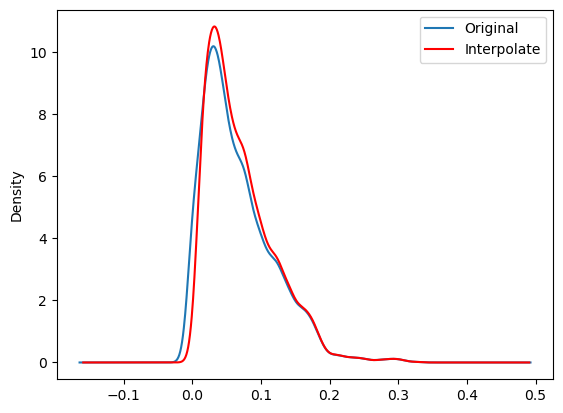

In [141]:
df['Item_Visibility'].plot(kind="kde",label="Original")
df["Item_Visibility_interpolate"].plot(kind="kde",color="red",label="Interpolate")
plt.legend()
plt.show()

In [142]:
df=df.drop('Item_Visibility',axis=1)
df.head(1)

Item_Identifier Item_Fat_Content Item_Type  Item_MRP Outlet_Identifier  \
0           FDA15               LF     Dairy  249.8092            OUT049   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   

         Outlet_Type  Item_Outlet_Sales  Item_Weight_interpolate  \
0  Supermarket Type1           3735.138                      9.3   

   Item_Visibility_interpolate  
0                     0.016047

In [143]:
df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interpolate', 'Item_Visibility_interpolate'],
      dtype='object')

In [144]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [145]:
df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interpolate', 'Item_Visibility_interpolate'],
      dtype='object')

In [146]:
df['Item_Identifier'].value_counts().sample(5)

Item_Identifier
DRH59    3
FDV39    7
FDO50    6
NCP17    5
FDQ09    6
Name: count, dtype: int64

In [147]:
df['Item_Identifier'] =df['Item_Identifier'].apply(lambda x:x[:2])

In [148]:
df['Item_Identifier'].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [149]:
df['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [150]:
import datetime as dt

In [151]:
current_year=dt.datetime.today().year

In [152]:
current_year

2024

In [153]:
df['Outlet_age']=current_year-df['Outlet_Establishment_Year']

In [154]:
df.head(1)

Item_Identifier Item_Fat_Content Item_Type  Item_MRP Outlet_Identifier  \
0              FD               LF     Dairy  249.8092            OUT049   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   

         Outlet_Type  Item_Outlet_Sales  Item_Weight_interpolate  \
0  Supermarket Type1           3735.138                      9.3   

   Item_Visibility_interpolate  Outlet_age  
0                     0.016047          25

In [155]:
df = df.drop('Outlet_Establishment_Year',axis=1)

In [156]:
df.head()

Item_Identifier Item_Fat_Content              Item_Type  Item_MRP  \
0              FD               LF                  Dairy  249.8092   
1              DR          Regular            Soft Drinks   48.2692   
2              FD               LF                   Meat  141.6180   
3              FD          Regular  Fruits and Vegetables  182.0950   
4              NC               LF              Household   53.8614   

  Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  \
0            OUT049      Medium               Tier 1  Supermarket Type1   
1            OUT018      Medium               Tier 3  Supermarket Type2   
2            OUT049      Medium               Tier 1  Supermarket Type1   
3            OUT010       Small               Tier 3      Grocery Store   
4            OUT013        High               Tier 3  Supermarket Type1   

   Item_Outlet_Sales  Item_Weight_interpolate  Item_Visibility_interpolate  \
0          3735.1380                     9.30                     0.016047   
1           443.4228                     5.92                     0.019278   
2          2097.2700                    17.50                     0.016760   
3           732.3800                    19.20                     0.015755   
4           994.7052                     8.93                     0.014751   

   Outlet_age  
0          25  
1          15  
2          25  
3          26  
4          37

In [157]:
from sklearn.preprocessing import OrdinalEncoder

df_encoded = df.copy()

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    df_encoded[col]=oe.fit_transform(df_encoded[[col]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [158]:
df_encoded.head(3)

Item_Identifier  Item_Fat_Content  Item_Type  Item_MRP  Outlet_Identifier  \
0              1.0               0.0        4.0  249.8092                9.0   
1              0.0               1.0       14.0   48.2692                3.0   
2              1.0               0.0       10.0  141.6180                9.0   

   Outlet_Size  Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  \
0          1.0                   0.0          1.0          3735.1380   
1          1.0                   2.0          2.0           443.4228   
2          1.0                   0.0          1.0          2097.2700   

   Item_Weight_interpolate  Item_Visibility_interpolate  Outlet_age  
0                     9.30                     0.016047          25  
1                     5.92                     0.019278          15  
2                    17.50                     0.016760          25

In [159]:
from sklearn.preprocessing import OrdinalEncoder

df_encoded = df.copy()

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    df_encoded[col]=oe.fit_transform(df_encoded[[col]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [160]:
df_encoded.head(3)

Item_Identifier  Item_Fat_Content  Item_Type  Item_MRP  Outlet_Identifier  \
0              1.0               0.0        4.0  249.8092                9.0   
1              0.0               1.0       14.0   48.2692                3.0   
2              1.0               0.0       10.0  141.6180                9.0   

   Outlet_Size  Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  \
0          1.0                   0.0          1.0          3735.1380   
1          1.0                   2.0          2.0           443.4228   
2          1.0                   0.0          1.0          2097.2700   

   Item_Weight_interpolate  Item_Visibility_interpolate  Outlet_age  
0                     9.30                     0.016047          25  
1                     5.92                     0.019278          15  
2                    17.50                     0.016760          25

In [161]:
X = df_encoded.drop('Item_Outlet_Sales',axis=1)
y = df_encoded['Item_Outlet_Sales']

In [162]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [163]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
rf = RandomForestRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(rf,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5549992903957147


In [164]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5954067732342189


In [165]:
xg = XGBRFRegressor(n_estimators=100,random_state=42)

xg1 = xg.fit(X,y)
pd.DataFrame({
    'feature':X.columns,
    'XGBRF_importance':xg1.feature_importances_
    
}).sort_values(by='XGBRF_importance',ascending=False)

feature  XGBRF_importance
7                   Outlet_Type          0.349864
5                   Outlet_Size          0.192658
10                   Outlet_age          0.175040
3                      Item_MRP          0.131012
4             Outlet_Identifier          0.130735
6          Outlet_Location_Type          0.013184
9   Item_Visibility_interpolate          0.002493
8       Item_Weight_interpolate          0.001770
2                     Item_Type          0.001566
0               Item_Identifier          0.000999
1              Item_Fat_Content          0.000680

In [166]:
['Item_Visibility_interpolate','Item_Weight_interploate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content']

['Item_Visibility_interpolate',
 'Item_Weight_interploate',
 'Item_Type',
 'Outlet_Location_Type',
 'Item_Identifier',
 'Item_Fat_Content']

In [167]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg1,X.drop(['Item_Visibility_interpolate','Item_Weight_interpolate','Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1),y,cv=5,scoring='r2')
print(scores.mean())

0.5966037632320667


In [168]:
final_df = X.drop(columns=['Item_Visibility_interpolate','Item_Weight_interpolate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1)


In [169]:
final_df

Item_MRP  Outlet_Identifier  Outlet_Size  Outlet_Type  Outlet_age
0     249.8092                9.0          1.0          1.0          25
1      48.2692                3.0          1.0          2.0          15
2     141.6180                9.0          1.0          1.0          25
3     182.0950                0.0          2.0          0.0          26
4      53.8614                1.0          0.0          1.0          37
...        ...                ...          ...          ...         ...
8518  214.5218                1.0          0.0          1.0          37
8519  108.1570                7.0          2.0          1.0          22
8520   85.1224                6.0          2.0          1.0          20
8521  103.1332                3.0          1.0          2.0          15
8522   75.4670                8.0          2.0          1.0          27

[8523 rows x 5 columns]

In [170]:
from xgboost import XGBRFRegressor


In [171]:
xg_final = XGBRFRegressor(
    base_score=0.5,
    booster='gbtree',
    colsample_bylevel=1,
    colsample_bytree=1,
    gamma=0,
    gpu_id=-1,
    importance_type='gain',
    interaction_constraints='',
    max_delta_step=0,
    max_depth=6,
    min_child_weight=1,
    missing=np.nan,
    monotone_constraints='()',
    n_estimators=100,
    n_jobs=4,
    num_parallel_tree=100,
    objective='reg:squarederror',
    random_state=0,
    reg_alpha=0,
    scale_pos_weight=1,
    tree_method='exact',
    validate_parameters=1,
    verbosity=None
)

In [172]:

xg_final.fit(final_df,y)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
               grow_policy=None, importance_type='gain',
               interaction_constraints='', max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=0, max_depth=6,
               max_leaves=None, min_child_weight=1, missing=nan,
               monotone_constraints='()', multi_strategy=None, n_estimators=100,
               n_jobs=4, num_parallel_tree=100, objective='reg:squarederror',
               random_state=0, ...)

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [174]:
X_train,X_test,y_train,y_test = train_test_split(final_df,y,
                                                 test_size=0.20,
                                                 random_state=42)

In [175]:
xg_final.fit(X_train,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
               grow_policy=None, importance_type='gain',
               interaction_constraints='', max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=0, max_depth=6,
               max_leaves=None, min_child_weight=1, missing=nan,
               monotone_constraints='()', multi_strategy=None, n_estimators=100,
               n_jobs=4, num_parallel_tree=100, objective='reg:squarederror',
               random_state=0, ...)

In [176]:
y_pred = xg_final.predict(X_test)

In [177]:
mean_absolute_error(y_test,y_pred)

714.4168458622603

In [178]:
pred = xg_final.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

2059.0977


In [179]:
print(f"Sales Value is between {pred-714.42} and {pred+714.42}")

Sales Value is between 1344.67765625 and 2773.51765625


In [180]:
### SAVE MODEL USING JOBLIB

In [181]:
import joblib

In [182]:
joblib.dump(xg_final,'bigmart_model')

['bigmart_model']

In [183]:
model = joblib.load('bigmart_model')

In [184]:
pred = model.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

2059.0977


In [185]:
print(f"Sales value is between {pred-714.42} and {pred+714.42}")

Sales value is between 1344.67765625 and 2773.51765625


In [186]:
import numpy as np
import datetime as dt
from tkinter import *
import joblib
current_year = dt.datetime.today().year
def show_entry_fields():
    p1=float(e1.get())
    #p4=float(e4.get())
    
    text = clicked.get()
    if text == "OUT010":
        p2=0
        print(p2)
    elif text=="OUT013":
        p2=1
        print(p2)
    elif text=="OUT017":
        p2=2
        print(p2)
    elif text=="OUT018":
        p2=3
        print(p2)
    elif text=="OUT019":
        p2=4
        print(p2)
    elif text=="OUT027":
        p2=5
        print(p2)
    elif text=="OUT035":
        p2=6
        print(p2)
    elif text=="OUT045":
        p2=7
        print(p2)
    elif text=="OUT046":
        p2=8
        print(p2)
    elif text=="OUT049":
        p2=9
        print(p2)
    text0 = clicked0.get()
    if text0 == "High":
        p3=0
        print(p3)
    elif text0=="Medium":
        p3=1
        print(p3)
    elif text0=="Small":
        p3=2
        print(p3)
        
    text1 = clicked1.get()
    if text1 == "Supermarket Type1":
        p4=1
        print(p4)
    elif text1=="Supermarket Type2":
        p4=2
        print(p4)
    elif text1=="Supermarket Type3":
        p4=3
        print(p4)
    elif text1=="Grocery Store":
        p4=0
        print(p4)
    
    p5=current_year - int(e5.get())
    print(p5)
    
    model = joblib.load('bigmart_model')
    result=model.predict(np.array([[p1,p2,p3,p4,p5]]))
    Label(master, text="Sales Amount is in between").grid(row=8)
    Label(master, text=float(result) -714.42 ).grid(row=10)
    Label(master, text="and").grid(row=11)
    Label(master, text=float(result) + 714.42) .grid(row=12)
    print("Sales amount", result)
    
master = Tk()
master.title("Big Mart Sales Prediction using Machine Learning")


label = Label(master, text = " Big Mart Sales Prediction using ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)

# Item_MRP	Outlet_Identifier	Outlet_Size	Outlet_Type	Outlet_age
Label(master, text="Item_MRP").grid(row=1)
Label(master, text="Outlet_Identifier").grid(row=2)
Label(master, text="Outlet_Size").grid(row=3)
Label(master, text="Outlet_Type").grid(row=4)
Label(master, text="Outlet_Establishment_Year").grid(row=5)


clicked = StringVar()
options = ['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049']

clicked0 = StringVar()

options0 = ['High', 'Medium', 'Small']

clicked1 = StringVar()
options1 = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3']

e1 = Entry(master)

e2 = OptionMenu(master , clicked , *options )
e2.configure(width=15)


e3 = OptionMenu(master , clicked0 , *options0 )
e3.configure(width=15)


e4 = OptionMenu(master , clicked1 , *options1 )
e4.configure(width=15)

e5 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

4
2
0
2
Sales amount [445.77835]


In [187]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

Mean Absolute Percentage Error: 0.56%
